In [1]:
place = 'Pittsburgh, Pennsylvania, USA'

In [2]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

ox.config(data_folder="test",log_file=False, log_console=True, use_cache=True)

In [3]:
import csv
with open('outer-road.csv','r') as lineData:
    lineData = csv.reader(lineData)
    headers = next(lineData)
    edges = [row for row in lineData]

In [4]:
# get a graph for whole city with additional buffer
pgh_full = ox.graph_from_place(place,
                          network_type="drive_service",
                          retain_all=True, simplify=True, truncate_by_edge=False, clean_periphery=True,
                          buffer_dist=900, name="PGH Full drive")
# Reproject for faster processing
pgh_full_prj = ox.project_graph(pgh_full)

In [5]:
print("Node number: %d" % pgh_full_prj.number_of_nodes())
print("Edge number: %d" % pgh_full_prj.number_of_edges())

Node number: 20930
Edge number: 56342


In [6]:
def idData(i):
    return headers.index(i)

In [7]:
pgh_full_prj[104185746][104185739]

AtlasView({0: {'osmid': 11651757, 'lanes': '2', 'name': 'Ainsworth Street', 'highway': 'residential', 'oneway': False, 'length': 38.786}})

In [15]:
for a in range(len(pgh_full_prj[104185746][104185739])):
    print(pgh_full_prj[104185746][104185739][a])

{'osmid': 11651757, 'lanes': '2', 'name': 'Ainsworth Street', 'highway': 'residential', 'oneway': False, 'length': 38.786}


In [16]:
def addAttr(k,f,t,r,o,s):
    if(s=='False'):
        pgh_full_prj.add_edge(f, t, key=k, river_bridge=r, out_boundary=o)
        pgh_full_prj.add_edge(t, f, key=k, river_bridge=r, out_boundary=o)
    else:
        pgh_full_prj.add_edge(f, t, key=k, river_bridge=r, out_boundary=o)

In [20]:
for edge in edges:
    f = int(edge[idData("from_")])
    t = int(edge[idData("to")])
    o = edge[idData("out_pgh")]
    r = edge[idData("river_bge")]
    s = edge[idData("oneway")]
    oid = edge[idData("osmid")]
    eoi = pgh_full_prj[f][t]
    num_edge = len(eoi)
    if(num_edge == 1): # Only ONE connection
        addAttr(0,f,t,r,o,s)
    else:
        for i in range(num_edge):
            if(eoi[i]['osmid'] == oid):
                addAttr(i,f,t,r,o,s)
    # No new edges will be added!
    assert len(pgh_full_prj[f][t]) == num_edge

In [21]:
pgh_full_prj[104185746][104185739]

AtlasView({0: {'osmid': 11651757, 'lanes': '2', 'name': 'Ainsworth Street', 'highway': 'residential', 'oneway': False, 'length': 38.786, 'river_bridge': '0', 'out_boundary': '0'}})

In [22]:
print("Node number: %d" % pgh_full_prj.number_of_nodes())
print("Edge number: %d" % pgh_full_prj.number_of_edges())

Node number: 20930
Edge number: 56342


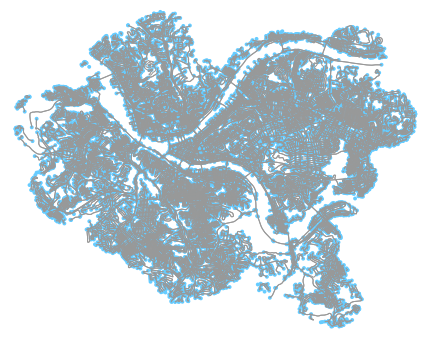

In [23]:
fig, ax = ox.plot_graph(pgh_full_prj)

In [24]:
ox.save_graphml(pgh_full_prj, filename='pgh_road_marked.graphml',gephi=True)